# load python libraries 

In [94]:
%matplotlib inline

from ipywidgets import interact, interactive, IntSlider, FloatSlider
from IPython.display import clear_output, display, HTML

from numpy import *
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

# Exposure

In [113]:
years = arange(1,101,1)

def Exposure(maximal_consumption, age_of_onset, age_of_quitting,
             time_to_max_exposure, time_to_complete_quitting):
    
    sigma_1 = time_to_max_exposure / 4 # (years) duration of the transition from no-smoking to smoking
    sigma_2 = time_to_complete_quitting / 4 # (years) duration of the transition from smoking to no-smoking
    t_1 = age_of_onset + 2 * sigma_1 # (years) time to 50% of maximal exposure after starting to smoke
    t_2 = age_of_quitting - 2 * sigma_1 # (years) time to 50% of maximal exposure when quitting
    
    def value(years, maximal_consumption,
               time_to_complete_quitting, age_of_quitting, 
               sigma_1, sigma_2, t_1, t_2):        
        if (time_to_complete_quitting == 130 | age_of_quitting == 130):
            return maximal_consumption * (1 / ( 1+exp( -(years-t_1)/sigma_1 ) ))  
        else:
            return maximal_consumption *  (1 / ( 1+exp( -(years-t_1)/sigma_1 ) )) * (1 / ( 1+exp(  (years-t_2)/sigma_2 ) )) 
  
    values = value(years, maximal_consumption,
               time_to_complete_quitting, age_of_quitting, 
               sigma_1, sigma_2, t_1, t_2)
    
    plt.plot(years, values)    
    plt.show()
    return years, values

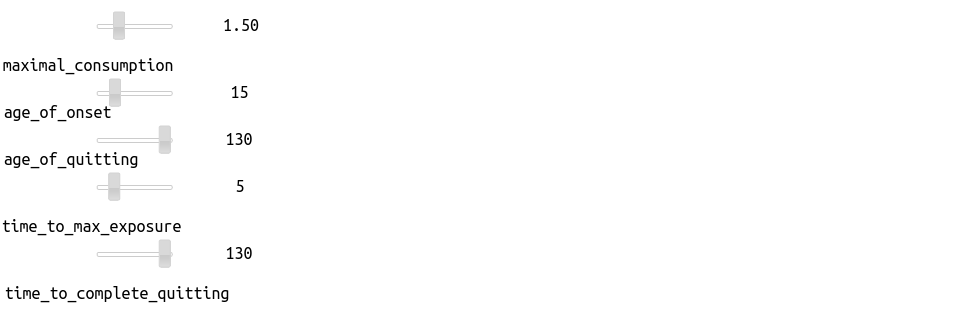

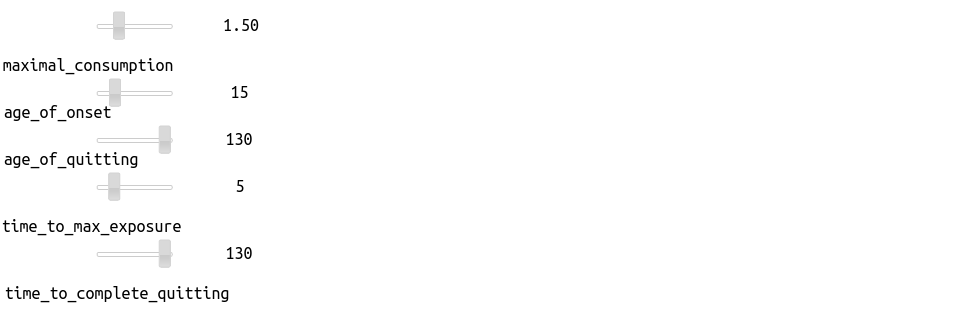

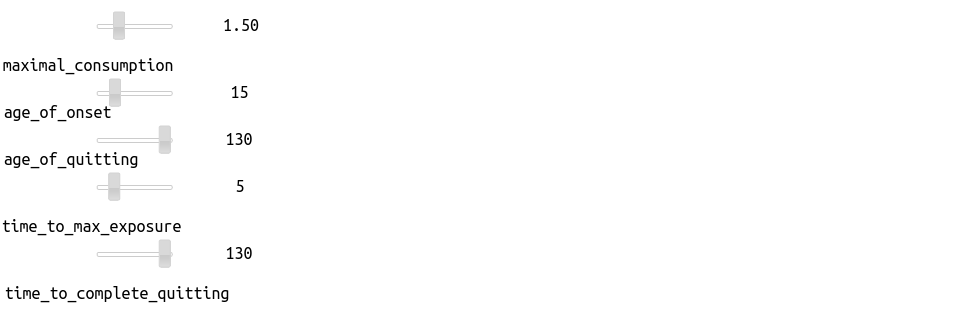

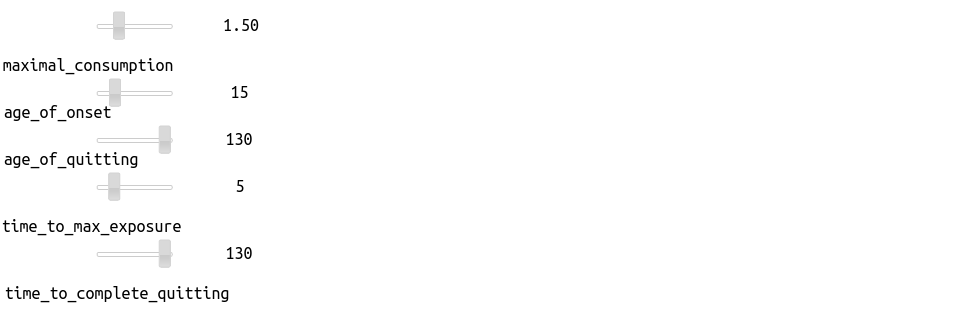

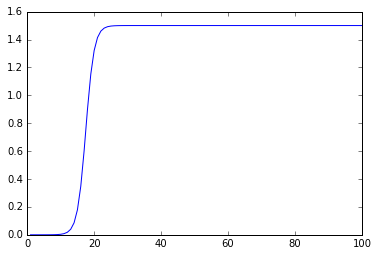

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([  2.77589666e-06,   6.17785762e-06,   1.37490056e-05,
          3.05986309e-05,   6.80968031e-05,   1.51543791e-04,
          3.37225155e-04,   7.50301661e-04,   1.66880405e-03,
          3.70893473e-03,   8.22944835e-03,   1.81926525e-02,
          3.98954904e-02,   8.59862638e-02,   1.78804383e-01,
          3.47212825e-01,   6.01968510e-01,   8.98031490e-01,
          1.15278718e+00,   1.32119562e+00,   1.41401374e+00,


In [124]:
E = interactive(Exposure, 
                age_of_onset = IntSlider(min=5,max=50,step=1,value=15), # years
                maximal_consumption = FloatSlider(min=0.1,max=5,step=0.1,value=1.5), # packs/day
                time_to_max_exposure = IntSlider(min=1,max=20,step=1,value=5), # years
                age_of_quitting = IntSlider(min=5,max=130,step=1,value=130), # years
                time_to_complete_quitting = IntSlider(min=5,max=130,step=1,value=130), # years
               )
display(E)
E_arguments = E.kwargs
years, E_values = E.result

# Activity

In [125]:
years = arange(1,101,1)

def Activity(exposure_trigger, slope_to_maximal_microphage_activity, 
            persistence_after_quitting):
    
    
    def value(years, exposure_trigger, slope_to_maximal_microphage_activity, 
            persistence_after_quitting):
            return 1
        
    values = value(years, exposure_trigger, slope_to_maximal_microphage_activity, 
            persistence_after_quitting)
    
    plt.plot(years, values)    
    plt.show()
    return years, values

In [ ]:
E = interactive(Exposure, 
                age_of_onset = IntSlider(min=5,max=50,step=1,value=15), # years
                maximal_consumption = FloatSlider(min=0.1,max=5,step=0.1,value=1.5), # packs/day
                time_to_max_exposure = IntSlider(min=1,max=20,step=1,value=5), # years
                age_of_quitting = IntSlider(min=5,max=130,step=1,value=130), # years
                time_to_complete_quitting = IntSlider(min=5,max=130,step=1,value=130), # years
               )
display(E)
E_arguments = E.kwargs
years, E_values = E.result